# Setup

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Importando dados

In [ ]:
notas = pd.read_csv('/content/drive/Shareddrives/Capacitação interna/Cursos/Cursos de Curta Duração/Tecnologia em saúde/Python/Alura/Exploratory Data Analysis/ratings.csv')

In [ ]:
filmes = pd.read_csv('/content/drive/Shareddrives/Capacitação interna/Cursos/Cursos de Curta Duração/Tecnologia em saúde/Python/Alura/Exploratory Data Analysis/movies.csv')

In [ ]:
imdb = pd.read_csv('/content/drive/Shareddrives/Capacitação interna/Cursos/Cursos de Curta Duração/Tecnologia em saúde/Python/Alura/Exploratory Data Analysis/movie_metadata.csv')

In [ ]:
notas.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [ ]:
notas.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


#Explorando dados

**Vendo primeiros valores**

In [ ]:
notas.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


**Vendo últimos valores**

In [ ]:
notas.tail()

,userId,movieId,rating,timestamp
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352
100835,610,170875,3.0,1493846415


**Tipos de dados**

In [ ]:
notas.dtypes

userId         int64
movieId        int64
rating       float64
timestamp      int64
dtype: object

**Vendo tamanho do dataset**

In [ ]:
notas.shape

(100836, 4)

**Renomeando colunas**

In [ ]:
notas.columns  = 'usuarioId', "filmeId", "nota", 'momento'

In [ ]:
filmes.columns = ['filmeId', 'titulo', 'generos']

**Identificando valores únicos**

In [ ]:
notas['nota'].unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

In [ ]:
notas['nota'].value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: nota, dtype: int64

**Identificando estatísticas da coluna**

In [ ]:
notas['nota'].mean()

3.501556983616962

In [ ]:
notas['nota'].median()

3.5

In [ ]:
notas.describe()

,usuarioId,filmeId,nota,momento
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


OBS: Para usar o método describe de forma coerente, prefira separar as variáveis numéricas e as variáveis categóricas

**Plotando distribuição**

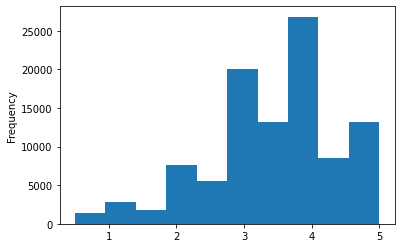

In [ ]:
notas['nota'].plot(kind='hist')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


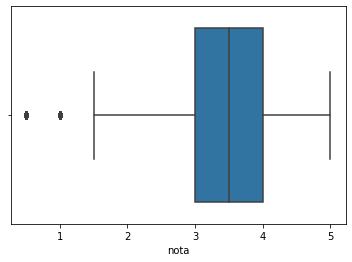

In [ ]:
sns.boxplot(notas['nota'])

**Pergunta para o dataset**

In [ ]:
notas['filmeId'] = notas['filmeId'].astype(str)

In [ ]:
notas.query('filmeId == 1').nota.mean()

3.9209302325581397

**Agrupando dados**

In [ ]:
media_por_filme = notas.groupby('filmeId').mean()['nota'].to_frame()
media_por_filme

,nota
filmeId,
1,3.920930
2,3.431818
3,3.259615
4,2.357143
5,3.071429
...,...
193581,4.000000
193583,3.500000
193585,3.500000


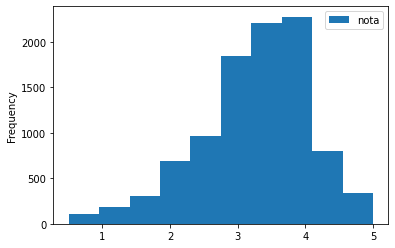

In [ ]:
media_por_filme.plot(kind = "hist")

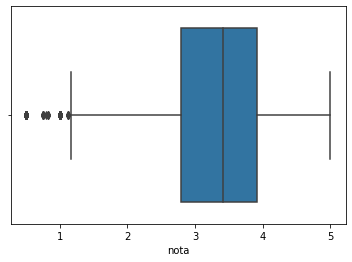

In [ ]:
sns.boxplot(media_por_filme['nota'])

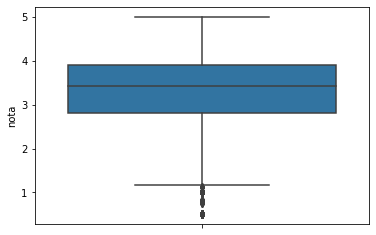

In [ ]:
sns.boxplot(y = media_por_filme['nota'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


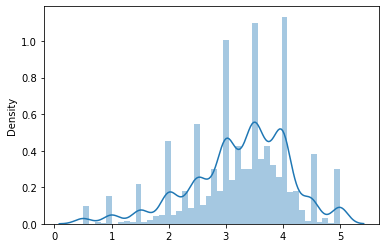

In [ ]:
sns.distplot(media_por_filme)

**Arrumando o dataframe**

In [ ]:
media_por_filme.reset_index()

,filmeId,nota
0,1,3.920930
1,2,3.431818
2,3,3.259615
3,4,2.357143
4,5,3.071429
...,...,...
9719,193581,4.000000
9720,193583,3.500000
9721,193585,3.500000
9722,193587,3.500000


**Comparando medidas**

In [ ]:
imdb.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [ ]:
total_por_lingua = imdb['language'].value_counts()

In [ ]:
total_ingles = total_por_lingua.loc['English']
total_ingles

4704

In [ ]:
total_geral = total_por_lingua.sum()
total_geral

5031

In [ ]:
total_resto = total_geral - total_ingles
total_resto

327

In [ ]:
dados = {
    'lingua' : ['ingles', 'outros'],
    'total' : [total_ingles,total_resto]
}
dados = pd.DataFrame(dados)

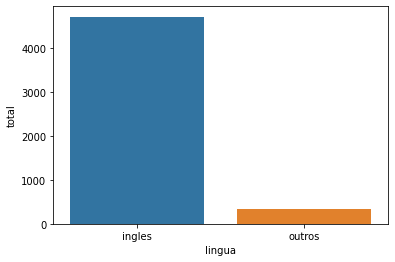

In [ ]:
sns.barplot(x = 'lingua', y = 'total', data = dados)

([<matplotlib.patches.Wedge at 0x7fc941ee13d0>,
 [Text(-1.077147181802304, 0.22305593185422004, 'ingles'),
  Text(1.077147181802304, -0.22305593185422018, 'outros')])

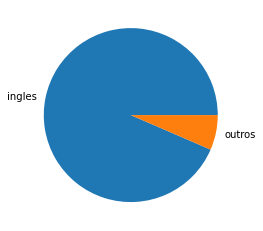

In [ ]:
plt.pie(dados['total'], labels = dados['lingua'])

In [ ]:
total_resto_distribuicao = imdb.query("language != 'English'")['language'].value_counts()
total_resto_distribuicao

French        73
Spanish       40
Hindi         28
Mandarin      26
German        19
Japanese      18
Cantonese     11
Italian       11
Russian       11
Korean         8
Portuguese     8
Danish         5
Swedish        5
Arabic         5
Hebrew         5
Polish         4
Norwegian      4
Dutch          4
Persian        4
Thai           3
Chinese        3
Dari           2
Icelandic      2
None           2
Aboriginal     2
Romanian       2
Indonesian     2
Zulu           2
Mongolian      1
Tamil          1
Greek          1
Slovenian      1
Urdu           1
Vietnamese     1
Dzongkha       1
Kannada        1
Panjabi        1
Czech          1
Filipino       1
Maya           1
Kazakh         1
Telugu         1
Hungarian      1
Bosnian        1
Aramaic        1
Swahili        1
Name: language, dtype: int64

In [ ]:
filmes_sem_ingles = imdb.query("language != 'English'")['language'].to_frame()
filmes_sem_ingles

,language
4,NaN
98,Japanese
204,Japanese
242,French
279,NaN
...,...
5022,Swahili
5026,French
5027,Persian
5029,Japanese


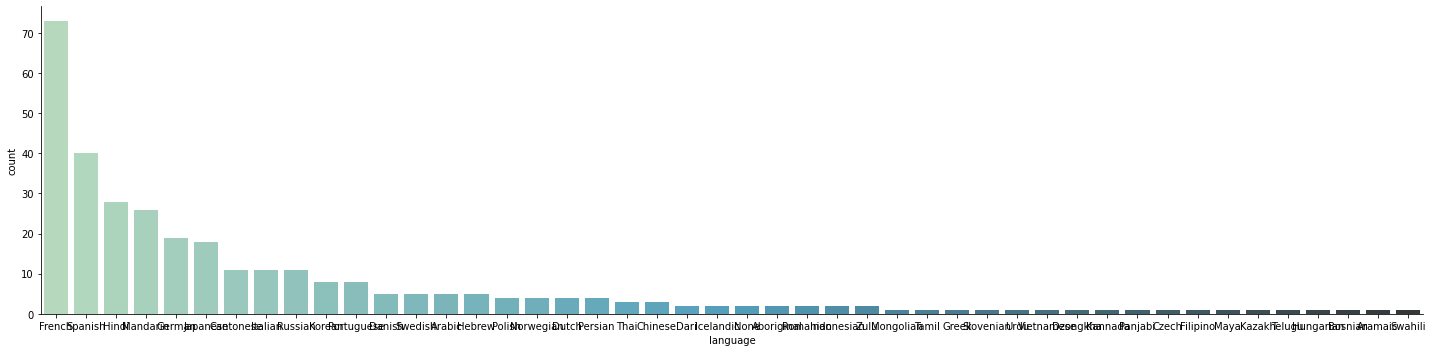

In [ ]:
sns.catplot(x = 'language', kind = 'count', data = filmes_sem_ingles, aspect = 4, order = total_resto_distribuicao.index, palette = 'GnBu_d')


**Resumindo dados**

In [ ]:
notas_do_toy_story = notas.query("filmeId==1")
notas_do_jumanji = notas.query("filmeId==2")
print(len(notas_do_toy_story), len(notas_do_jumanji))

215 110


In [ ]:
print("Nota média do Toy Story %.2f" % notas_do_toy_story.nota.mean())
print("Nota média do Jumanji %.2f" % notas_do_jumanji.nota.mean())

print(notas_do_toy_story.nota.std(), notas_do_jumanji.nota.std())

Nota média do Toy Story 3.92
Nota média do Jumanji 3.43
0.8348591407114047 0.8817134921476455


In [ ]:
print("Nota média do Toy Story %.2f" % notas_do_toy_story.nota.mean())
print("Nota média do Jumanji %.2f" % notas_do_jumanji.nota.mean())

print(notas_do_toy_story.nota.std(), notas_do_jumanji.nota.std())

Nota média do Toy Story 3.92
Nota média do Jumanji 3.43
0.8348591407114047 0.8817134921476455


In [ ]:
print("Nota mediana do Toy Story %.2f" % notas_do_toy_story.nota.median())
print("Nota mediana do Jumanji %.2f" % notas_do_jumanji.nota.median()) 

Nota mediana do Toy Story 4.00
Nota mediana do Jumanji 3.50
